# Исследование надежности заемщиков.

# Описание проекта
**Заказчик — кредитный отдел банка.** 
Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Ход исследования**

Данные о поведении пользователей беру из файла `/datasets/data.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Таким образом, исследование пройдёт в четыре этапа:

* Обзор данных.
* Предобработка данных.
* Ответы на вопросы.
* Выводы исследования

### Шаг 1. Обзор данных
Первым делом импортируем библиотеку, смотрим данные, названия столбцов, кол-во пропусков, кол-во дубликатов, какие типы данных находятся в столбцах датасета, затем методом .describe() смотрим основную информацию по датасету.

In [1]:
import pandas as pd #импорт библиотеки
main_dataset = pd.read_csv('/datasets/data.csv') #чтение файла
main_dataset.info() #получаем предварительную информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Видны пропуски в колонке "days_employed" и в "total_income".

Обозначения строчек:

* children — количество детей в семье,
* days_employed — общий трудовой стаж в днях,
* dob_years — возраст клиента в годах,
* education — уровень образования клиента,
* education_id — идентификатор уровня образования,
* family_status — семейное положение,
* family_status_id — идентификатор семейного положения,
* gender — пол клиента,
* income_type — тип занятости,
* debt — имел ли задолженность по возврату кредитов,
* total_income — ежемесячный доход,
* purpose — цель получения кредита.

Посмотрим первые десять и последние десять строчек датасета.

In [2]:
main_dataset.head(10) #первые 10 строчек

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
main_dataset.tail(10) #последние 10 строчек

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


In [4]:
main_dataset.describe() #числовое описание данных

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [5]:
main_dataset.duplicated().sum() #кол-во явных дубликатов в датасете

54

Возможно дубликаты появились потому, что некоторые люди оставляли заявки на кредит несколько раз. 

**Проверим колонки типа object**

In [6]:
display('уникальные значения в семейном полжении')
display(main_dataset['family_status'].unique()) #уникальные значения в 'семейном полжении'
display('кол-во уникальных значений в количество детей')
display(main_dataset['children'].value_counts()) #кол-во уникальных значений в 'количество детей'
display('уникальные значения в образовании')
display(main_dataset['education'].unique()) #уникальные значения в 'образовании'
display('уникальные значения в типе занятости')
display(main_dataset['income_type'].unique()) #уникальные значения в 'типе занятости'
display('уникальные значения в целях получения кредита')
display(main_dataset['purpose'].unique()) #уникальные значения в 'целях получения кредита'


'уникальные значения в семейном полжении'

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

'кол-во уникальных значений в количество детей'

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

'уникальные значения в образовании'

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

'уникальные значения в типе занятости'

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

'уникальные значения в целях получения кредита'

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Из полученных данных мы видим следующие проблемы:

* названия столбцов не везде качественно отражают суть содержания. 
* в датасете находится 54 явных дубликата
* в датасете присутствуют неявные дубликаты в колонках "education", "purpose" (по типу "автомобили", "на покупку автомобиля" и "сделка с автомобилем")
* в колонке "education" значения записаны по-разному (не snake_case)
* колонка "children" имеет отрицательные показатели, а также значение 20 (похоже на аномалию, возможно при записи человек допустил ошибку: написал лишний ноль или поставил "-" перед значением).
* минимальный возраст клиента равен 0
* не понятно в чем измеряется заработная плата
* в колонке "days_employed" находятся отрицательные значения и таких значений очень много, также велико стандартное отклонение.
* колонка "days_employed" записана не в целых числах, хотя речь идет о целых днях.  
* в колонке "total_income" находятся значения, которые лучше перевести в целые числа. 

**Исправление названий колонок**

In [7]:
display(main_dataset.columns)
main_dataset = main_dataset.rename(
    columns={
        'children': 'number_of_children',
        'dob_years': 'client_age',
        'education': 'level_of_education',
        'education_id': 'level_of_education_id',
        'total_income': 'monthly_income', 
        'purpose': 'credit_purpose', 'income_type': 'type_of_employment'}
)
display('новые названия колонок',main_dataset.columns)

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

'новые названия колонок'

Index(['number_of_children', 'days_employed', 'client_age',
       'level_of_education', 'level_of_education_id', 'family_status',
       'family_status_id', 'gender', 'type_of_employment', 'debt',
       'monthly_income', 'credit_purpose'],
      dtype='object')

### Шаг 2.1 Заполнение пропусков

In [8]:
main_dataset.isnull().sum() #суммарное количество пропусков

number_of_children          0
days_employed            2174
client_age                  0
level_of_education          0
level_of_education_id       0
family_status               0
family_status_id            0
gender                      0
type_of_employment          0
debt                        0
monthly_income           2174
credit_purpose              0
dtype: int64

In [9]:
main_dataset.query('monthly_income == 0 and days_employed == 0')

,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose


В колонках "days_employed" и "monthly_income" одинаковое количество пропусков. Было предположение, что скорее всего это молодые люди без опыта работы, а значит и без ежемесячной зарплаты (намеренные пропуски), однако видно, что данные пропущены у людей разных возрастов. Либо произошла ошибка при выгрузке данных либо на входе. 

In [10]:
display(
    main_dataset.loc[
        main_dataset['days_employed'].isnull()] == main_dataset.loc[
        main_dataset['monthly_income'].isnull()])



,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose
12,True,False,True,True,True,True,True,True,True,True,False,True
26,True,False,True,True,True,True,True,True,True,True,False,True
29,True,False,True,True,True,True,True,True,True,True,False,True
41,True,False,True,True,True,True,True,True,True,True,False,True
55,True,False,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,True,False,True,True,True,True,True,True,True,True,False,True
21495,True,False,True,True,True,True,True,True,True,True,False,True
21497,True,False,True,True,True,True,True,True,True,True,False,True
21502,True,False,True,True,True,True,True,True,True,True,False,True


In [11]:
pd.options.display.float_format = '{:,.1f}'.format
display('days_employed',main_dataset['days_employed'].describe())
display('monthly_income',main_dataset['monthly_income'].describe())

'days_employed'

count    19,351.0
mean     63,046.5
std     140,827.3
min     -18,388.9
25%      -2,747.4
50%      -1,203.4
75%        -291.1
max     401,755.4
Name: days_employed, dtype: float64

'monthly_income'

count      19,351.0
mean      167,422.3
std       102,971.6
min        20,667.3
25%       103,053.2
50%       145,017.9
75%       203,435.1
max     2,265,604.0
Name: monthly_income, dtype: float64

In [12]:
ratio_days_employed = 2174/len(main_dataset) #доля пропущенных значений в "days_employed" от общего числа
ratio_monthly_income = 2174/len(main_dataset) #доля пропущенных значений в "monthly_income" от общего числа
display(f'доля пропущенных значений в "days_employed" от общего числа равна {ratio_days_employed:.2%}',
        f'доля пропущенных значений в "monthly_income" от общего числа равна {ratio_monthly_income:.2%}')

'доля пропущенных значений в "days_employed" от общего числа равна 10.10%'

'доля пропущенных значений в "monthly_income" от общего числа равна 10.10%'

In [13]:
omission = len(
    main_dataset.loc[
        main_dataset['days_employed'].isnull()] == main_dataset.loc[
        main_dataset['monthly_income'].isnull()])
ratio_days_employed = omission/len(main_dataset) #доля пропущенных значений в "days_employed" от общего числа
ratio_monthly_income = omission/len(main_dataset) #доля пропущенных значений в "monthly_income" от общего числа
display(f'доля пропущенных значений в "days_employed" от общего числа равна {ratio_days_employed:.2%}',
        f'доля пропущенных значений в "monthly_income" от общего числа равна {ratio_monthly_income:.2%}')

'доля пропущенных значений в "days_employed" от общего числа равна 10.10%'

'доля пропущенных значений в "monthly_income" от общего числа равна 10.10%'

In [14]:
median_monthly_income = main_dataset['monthly_income'].median() #медианное значение в столбце 'monthly_income'
main_dataset['monthly_income'] = main_dataset.groupby(
    "type_of_employment")["monthly_income"].transform(
    lambda x: x.fillna(x.median())) #заполняем пропуски медианными значениями согласну типу занятоси
main_dataset.isnull().sum() #проверяем пропуски

number_of_children          0
days_employed            2174
client_age                  0
level_of_education          0
level_of_education_id       0
family_status               0
family_status_id            0
gender                      0
type_of_employment          0
debt                        0
monthly_income              0
credit_purpose              0
dtype: int64

В данных могут находиться аномалии, поэтому пропуски лучше всего заполнить медианным значением, так будет надежнее. 

### Шаг 2.2 Проверка данных на аномалии и исправления.

In [15]:
display('пенсионеры',len(main_dataset.query('type_of_employment == "пенсионер"')))
display('кол-во строк у кого стаж больше 100000 дней',len(main_dataset.query('days_employed > 100000')))
display('кол-во НЕ пенсионеров',len(main_dataset)-len(main_dataset.query('type_of_employment == "пенсионер"')))

'пенсионеры'

3856

'кол-во строк у кого стаж больше 100000 дней'

3445

'кол-во НЕ пенсионеров'

17669

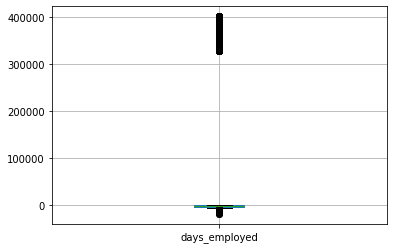

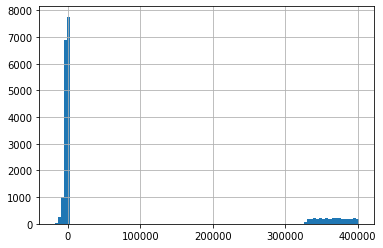

In [16]:
import matplotlib.pyplot as plt
main_dataset.boxplot(column='days_employed')
plt.show()
main_dataset['days_employed'].hist(bins=100, range=(-18388.949901, 401755.400475))
plt.show()


In [17]:
display(main_dataset['days_employed'].median())
main_dataset['days_employed'] = main_dataset['days_employed'].abs()
display(main_dataset['days_employed'].median())

-1203.369528770489

2194.220566878695

In [18]:
display('days_employed',main_dataset['days_employed'].describe())

'days_employed'

count    19,351.0
mean     66,914.7
std     139,030.9
min          24.1
25%         927.0
50%       2,194.2
75%       5,537.9
max     401,755.4
Name: days_employed, dtype: float64

In [19]:
median_days_employed = main_dataset['days_employed'].median() #медианное значение
display(median_days_employed)
main_dataset['days_employed'] = main_dataset['days_employed'].fillna(median_days_employed) 
#замена пропусков медианными значениями 
main_dataset.isnull().sum() #проверка на пропущенные значения

2194.220566878695

number_of_children       0
days_employed            0
client_age               0
level_of_education       0
level_of_education_id    0
family_status            0
family_status_id         0
gender                   0
type_of_employment       0
debt                     0
monthly_income           0
credit_purpose           0
dtype: int64

In [20]:
try:
    def replacement(value):
        if value > 100000:
            value = median_days_employed
            return value
        else:
            return value
    main_dataset['days_employed'] = main_dataset['days_employed'].apply(replacement)
except:
    print("не получается заменить аномальные значения на медиану")
        

  
   

In [21]:
display(main_dataset.query('days_employed == 2194.220566878695').head())
#проверка функции на работоспособность

,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose
4,0,"2,194.2",53,среднее,1,гражданский брак,1,F,пенсионер,0,"158,616.1",сыграть свадьбу
12,0,"2,194.2",65,среднее,1,гражданский брак,1,M,пенсионер,0,"118,514.5",сыграть свадьбу
18,0,"2,194.2",53,среднее,1,вдовец / вдова,2,F,пенсионер,0,"56,823.8",на покупку подержанного автомобиля
24,1,"2,194.2",57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,"290,547.2",операции с коммерческой недвижимостью
25,0,"2,194.2",67,среднее,1,женат / замужем,0,M,пенсионер,0,"55,112.8",покупка недвижимости


In [22]:
main_dataset

,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose
0,1,"8,437.7",42,высшее,0,женат / замужем,0,F,сотрудник,0,"253,875.6",покупка жилья
1,1,"4,024.8",36,среднее,1,женат / замужем,0,F,сотрудник,0,"112,080.0",приобретение автомобиля
2,0,"5,623.4",33,Среднее,1,женат / замужем,0,M,сотрудник,0,"145,886.0",покупка жилья
3,3,"4,124.7",32,среднее,1,женат / замужем,0,M,сотрудник,0,"267,628.6",дополнительное образование
4,0,"2,194.2",53,среднее,1,гражданский брак,1,F,пенсионер,0,"158,616.1",сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,"4,529.3",43,среднее,1,гражданский брак,1,F,компаньон,0,"224,791.9",операции с жильем
21521,0,"2,194.2",67,среднее,1,женат / замужем,0,F,пенсионер,0,"155,999.8",сделка с автомобилем
21522,1,"2,113.3",38,среднее,1,гражданский брак,1,M,сотрудник,1,"89,672.6",недвижимость
21523,3,"3,112.5",38,среднее,1,женат / замужем,0,M,сотрудник,1,"244,093.1",на покупку своего автомобиля


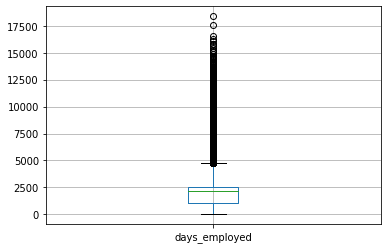

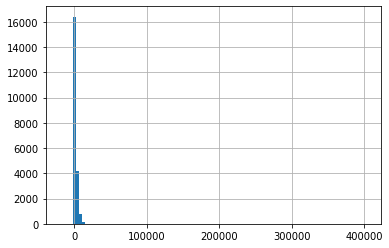

In [23]:
main_dataset.boxplot(column='days_employed')
plt.show()
main_dataset['days_employed'].hist(bins=100, range=(-18388.949901, 401755.400475))
plt.show()


### Шаг 2.3. Изменение типов данных.

In [24]:
main_dataset['monthly_income'] = main_dataset['monthly_income'].astype(int) 
#Замена вещественного типа данных в столбце monthly_income на целочисленный

### Шаг 2.4. Удаление дубликатов.

Ранее было проверено, что датасет содержит 54 явных дубля, следует их убрать из датасета. 

In [25]:
main_dataset = main_dataset.drop_duplicates().reset_index(drop=True) 
#удаление дублей и обновление индексов

In [26]:
main_dataset.duplicated().sum() #кол-во явных дубликатов в датасете

0

**Удаление неявных дубликатов**

Удаление неявных дубликатов в столбце "education"

In [27]:
main_dataset['level_of_education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [28]:
main_dataset['level_of_education'] = main_dataset['level_of_education'].str.lower()
main_dataset['level_of_education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [29]:
main_dataset['family_status'] = main_dataset['family_status'].str.lower()
main_dataset['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'], dtype=object)

In [30]:
main_dataset['days_employed'] = main_dataset['days_employed'].astype(int) 
#Замена вещественного типа данных в столбце days_employed на целочисленный

In [31]:
main_dataset.head()

,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,2194,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


In [32]:
main_dataset['credit_purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Из данного списка видно, что люди, планирующие брать кредит преследуют 4 цели: 
* недвижимость, 
* автомобиль, 
* образование, 
* свадьба. 

Возможно, данные записывались разными людьми, именно по этой причине данные записаны по-разному, хотя суть у них одна и та же. 

In [33]:
main_dataset['number_of_children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [34]:
main_dataset['number_of_children'] = main_dataset['number_of_children'].abs()
main_dataset['number_of_children'].unique()

array([ 1,  0,  3,  2,  4, 20,  5])

In [35]:
main_dataset['number_of_children'] = main_dataset['number_of_children'].replace(20, 2) 
#возможно произошла ошибка при записи кол-ва детей
#так как не наблюдается кол-во детей от 6 до 19, и человек записал лишний "0".
main_dataset['number_of_children'].unique()

array([1, 0, 3, 2, 4, 5])

In [36]:
main_dataset['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [37]:
display(main_dataset[main_dataset['gender']=='XNA'])

,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose
10690,0,2358,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости


In [38]:
display(len(main_dataset.loc[main_dataset['gender']=='F'])) #количество
#женщин в датасете
display(len(main_dataset.loc[main_dataset['gender']=='M'])) #количество
#мужчин в датасете
display(len(main_dataset.loc[main_dataset['gender']=='XNA'])) #количество
#аномальных значений в датасете
def replacement_gender(value):
    if value == 'XNA':
        value = 'F'
        return value
    else:
        return value
main_dataset['gender'] = main_dataset['gender'].apply(replacement_gender)

display(len(main_dataset.loc[main_dataset['gender']=='XNA'])) #проверка 
#работоспособности функции

14189

7281

1

0

Возможно это трансгендер, или заявка была принята по телефону и человек не смогу определить пол, поэтому потсавил значение XNA
Заменил аномальное значение на "женщину", так как количество женщин в датасете в два раза больше. 

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [39]:
display(len(main_dataset['level_of_education'].unique())) #кол-во уникальных значений для образования
display(len(main_dataset['level_of_education_id'].unique())) #кол-во уникальных значений для id в образовании
display(main_dataset.loc[main_dataset['level_of_education_id'] == 0].head(2))
display(main_dataset.loc[main_dataset['level_of_education_id'] == 1].head(2))
display(main_dataset.loc[main_dataset['level_of_education_id'] == 2].head(2))
display(main_dataset.loc[main_dataset['level_of_education_id'] == 3].head(2))
display(main_dataset.loc[main_dataset['level_of_education_id'] == 4].head(2))

5

5

,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья


,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья


,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose
13,0,1846,54,неоконченное высшее,2,женат / замужем,0,F,сотрудник,0,130458,приобретение автомобиля
42,0,1257,20,неоконченное высшее,2,не женат / не замужем,4,F,сотрудник,0,82065,получение образования


,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose
31,0,1682,47,начальное,3,женат / замужем,0,F,сотрудник,0,275485,жилье
136,0,2194,60,начальное,3,женат / замужем,0,M,пенсионер,0,113124,операции со своей недвижимостью


,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose
2962,0,2194,69,ученая степень,4,женат / замужем,0,M,пенсионер,0,98752,покупка жилой недвижимости
4169,0,409,45,ученая степень,4,не женат / не замужем,4,M,сотрудник,0,198570,операции с коммерческой недвижимостью


Создание словаря для образования

In [40]:
vocabulary_education = { 
    'высшее': 0,
    'среднее': 1, 
    'неоконченное высшее': 2,
    'начальное': 3,
    'ученая степень': 4
}
display(vocabulary_education)

{'высшее': 0,
 'среднее': 1,
 'неоконченное высшее': 2,
 'начальное': 3,
 'ученая степень': 4}

In [41]:
display(len(main_dataset['family_status'].unique())) #кол-во уникальных значений для семьи
display(len(main_dataset['family_status_id'].unique())) #кол-во уникальных значений для id в семье
display(main_dataset.loc[main_dataset['family_status_id'] == 0].head(2))
display(main_dataset.loc[main_dataset['family_status_id'] == 1].head(2))
display(main_dataset.loc[main_dataset['family_status_id'] == 2].head(2))
display(main_dataset.loc[main_dataset['family_status_id'] == 3].head(2))
display(main_dataset.loc[main_dataset['family_status_id'] == 4].head(2))

5

5

,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля


,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose
4,0,2194,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья


,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose
18,0,2194,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823,на покупку подержанного автомобиля
56,0,2194,64,среднее,1,вдовец / вдова,2,F,пенсионер,0,149141,образование


,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose
19,0,10038,48,среднее,1,в разводе,3,F,сотрудник,0,242831,на покупку своего автомобиля
43,0,4375,43,неоконченное высшее,2,в разводе,3,F,компаньон,0,272957,приобретение автомобиля


,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose
24,1,2194,57,среднее,1,не женат / не замужем,4,F,пенсионер,0,290547,операции с коммерческой недвижимостью
29,0,2194,63,среднее,1,не женат / не замужем,4,F,пенсионер,0,118514,строительство жилой недвижимости


In [42]:
vocabulary_family = { 
    'женат / замужем': 0,
    'гражданский брак': 1, 
    'вдовец / вдова': 2,
    'в разводе': 3,
    'не женат / не замужем': 4
}
display(vocabulary_family)

{'женат / замужем': 0,
 'гражданский брак': 1,
 'вдовец / вдова': 2,
 'в разводе': 3,
 'не женат / не замужем': 4}

### Шаг 2.6. Категоризация дохода.

In [43]:
def category_income(monthly_income): #функция для категоризации доходов
    if monthly_income >= 0 and monthly_income <= 30000:
        return 'E'
    if monthly_income >= 30001 and monthly_income <= 50000:
        return 'D'
    if monthly_income >= 50001 and monthly_income <= 200000:
        return 'C'
    if monthly_income >= 200001 and monthly_income <= 1000000:
        return 'B'
    if monthly_income >= 1000001:
        return 'A'
    
    
main_dataset['total_income_category'] = main_dataset['monthly_income'].apply(category_income)
display(main_dataset['total_income_category'].value_counts()) #кол-во различных целей на кредит
display(main_dataset['total_income_category'].isna().sum()) #кол-во пропусков в новом столбце
main_dataset.head()

C    16032
B     5042
D      350
A       25
E       22
Name: total_income_category, dtype: int64

0

,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose,total_income_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,2194,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C


### Шаг 2.7. Категоризация целей кредита.

In [44]:
def category_purpose(i): #функция для категоризации целей
    if 'авто' in i:
        return 'операции с автомобилем'
    elif 'недвиж' in i or 'жиль' in i:
        return 'операции с недвижимостью'
    elif 'свад' in i:
        return 'проведение свадьбы'
    elif 'образ' in i:
        return 'получение образования'
    else:
        return 5
    
main_dataset['purpose_category'] = main_dataset['credit_purpose'].apply(category_purpose)

display(main_dataset['purpose_category'].value_counts()) #кол-во различных целей на кредит
display(main_dataset['purpose_category'].isna().sum()) #кол-во пропусков в новом столбце 
display(main_dataset.head())


операции с недвижимостью    10814
операции с автомобилем       4308
получение образования        4014
проведение свадьбы           2335
Name: purpose_category, dtype: int64

0

,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose,total_income_category,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,2194,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [45]:
main_dataset['debt'].value_counts() #кол-во долгов (1)

0    19730
1     1741
Name: debt, dtype: int64

In [46]:
main_dataset.query('debt == 1')

,number_of_children,days_employed,client_age,level_of_education,level_of_education_id,family_status,family_status_id,gender,type_of_employment,debt,monthly_income,credit_purpose,total_income_category,purpose_category
14,0,1844,56,высшее,0,гражданский брак,1,F,компаньон,1,165127,покупка жилой недвижимости,C,операции с недвижимостью
32,0,4649,34,среднее,1,гражданский брак,1,F,сотрудник,1,139057,на проведение свадьбы,C,проведение свадьбы
38,0,597,25,высшее,0,не женат / не замужем,4,M,сотрудник,1,192247,образование,C,получение образования
55,0,2194,54,среднее,1,гражданский брак,1,F,пенсионер,1,118514,сыграть свадьбу,C,проведение свадьбы
75,1,2953,38,среднее,1,женат / замужем,0,M,сотрудник,1,81935,операции с недвижимостью,C,операции с недвижимостью
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0,960,39,среднее,1,гражданский брак,1,M,компаньон,1,176369,дополнительное образование,C,получение образования
21457,0,612,29,высшее,0,гражданский брак,1,F,сотрудник,1,140068,покупка жилья для сдачи,C,операции с недвижимостью
21461,1,467,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486,заняться образованием,C,получение образования
21468,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью


### Ответы на вопросы.

##### Вопрос 1:

**Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [47]:
ratio_debt = main_dataset.pivot_table(index = ['number_of_children'], values='debt', aggfunc = ('sum'))
ratio_debt['count_family'] = main_dataset.groupby('number_of_children')['debt'].count()
ratio_debt['ratio_debt'] = ratio_debt['debt'] / ratio_debt['count_family'] *100

display(ratio_debt.sort_values('ratio_debt', ascending = True))


,debt,count_family,ratio_debt
number_of_children,,,
5,0,9,0.0
0,1063,14107,7.5
3,27,330,8.2
1,445,4856,9.2
2,202,2128,9.5
4,4,41,9.8


##### Вывод 1:

На данной таблице видно, что наличие детей влияет на количество возвращенных вовремя долгов. Семьи, имеющие 1,2,3,4 ребенка и не имеющие в принципе имеют разный процент просроченных платежей (варьируется от 7,5 до 9,8 процентов), это может показаться небольшой разниицей, но в данной ситуации это огромная разница, так как уровень долговой нагрузи населения России перед банками составляют аж 23'900'000'000'000 рублей, это значит, что малый процент может составлять большие суммы. Исключение составляют семьи с 5 детьми, но по ним имеется слишком мало информации, поэтому по ним следует иметь большее кол-во данных, чтобы говорить о серьезных выводах. 

##### Вопрос 2:

**Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [48]:
ratio_family = main_dataset.pivot_table(index = ['family_status'], values='debt', aggfunc = ('sum'))
ratio_family['count_family'] = main_dataset.groupby('family_status')['debt'].count()
ratio_family['ratio_debt'] = ratio_family['debt'] / ratio_family['count_family'] *100

display(ratio_family.sort_values('ratio_debt', ascending = True))


,debt,count_family,ratio_debt
family_status,,,
вдовец / вдова,63,959,6.6
в разводе,85,1195,7.1
женат / замужем,931,12344,7.5
гражданский брак,388,4163,9.3
не женат / не замужем,274,2810,9.8


##### Вывод 2:

С помощью данной таблицы можно сделать выводы, что семейное положение сильно влияет на возврат кредита в срок. Процент просроченных кредитов варьируются от 6,6% до 9,8%. 
Люди потерявшие мужа/жену имеют самый низкий процент долгов из всех респондентов, что составляет 6,6%. Можно выдвинуть гипотезу о том, что люди потерявшие жену/мужа имеют наследство от второй половинки, поэтому они чаще других возвращают кредит вовремя. 
Люди живущие в разводе не отдают кредит вовремя в 7,1% случаях. 
Большое количество просроченных долгов имеют люди в браке, или те, кто живет гражданским браком. Возможно, это обусловлено тем, что в данном случае люди имеют общий бюджет, поэтому одному из представителей брака сложнее отдать долг вовремя.
Самый большой процент просроченных оплат (9,8%) имеют неженатые люди. Возможно это люди, которые еще не готовы к семейной и ответсвенной жизни, именно поэтому они так халатно относятся к возврату кредитов вовремя.     

##### Вопрос 3:

**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [49]:
ratio_income = main_dataset.pivot_table(index = 'total_income_category', values='debt', aggfunc = ('sum'))
ratio_income['count_people'] = main_dataset.groupby('total_income_category')['debt'].count()
ratio_income['ratio_debt'] = ratio_income['debt'] / ratio_income['count_people'] *100

display(ratio_income.sort_values('ratio_debt', ascending = True))
display("Доход 0–30000 — 'E'",
        "Доход 30001–50000 — 'D'",
        "Доход 50001–200000 — 'C'",
        "Доход 200001–1000000 — 'B'",
        "Доход 1000001 и выше — 'A'")

,debt,count_people,ratio_debt
total_income_category,,,
D,21,350,6.0
B,356,5042,7.1
A,2,25,8.0
C,1360,16032,8.5
E,2,22,9.1


"Доход 0–30000 — 'E'"

"Доход 30001–50000 — 'D'"

"Доход 50001–200000 — 'C'"

"Доход 200001–1000000 — 'B'"

"Доход 1000001 и выше — 'A'"

##### Вывод 3:

Данная таблица говорит о том, что уровень дохода влияет на количество неуплаченных кредитов в срок. Однако не стоит серьезно воспринимать людей, имеющих доход меньше 30'000 и больше 1'000'000, так как такое кол-во респондентов слишком малое для серьезных выводов. Чаще отдают кредит в срок люди, имеющие доход категории D (всего 6% просроченных кредитов). 
Чаще всего люди имеют долги, если их доход составляет от 50 тыс. до 200 тыс. рублей (8,5% просроченных кредитов).

##### Вопрос 4:

**Как разные цели кредита влияют на его возврат в срок?**

In [50]:
ratio_purpose = main_dataset.pivot_table(index = 'purpose_category', values='debt', aggfunc = ('sum'))
ratio_purpose['count_people'] = main_dataset.groupby('purpose_category')['debt'].count()
ratio_purpose['ratio_debt'] = ratio_purpose['debt'] / ratio_purpose['count_people'] *100

display(ratio_purpose.sort_values('ratio_debt', ascending = True))

,debt,count_people,ratio_debt
purpose_category,,,
операции с недвижимостью,782,10814,7.2
проведение свадьбы,186,2335,8.0
получение образования,370,4014,9.2
операции с автомобилем,403,4308,9.4


##### Вывод 4:

На данной таблице видно, что цель кредита влияет на возврат кредита в срок. Меньше всего задолженностей (7,2%) имеют люди, берущие кредит на операции с недвижимостью. Самый большой процент (9,4%) просроченных кредитов составляют люди, приобретающие кредит на операции с автомобилем. 

# Общий вывод:

**Ход исследования:**

После получения данных от кредитного отдела банка была проведена предобработка данных, включающая в себе переименоание строк, а также исправление значений внутри датасета, к примеру все значения колонки "уровня образования" приведену к общему нижнему регистру, в колонке "цели получения кредита" значения стали ограничены до 4 типов и т.д. 

Далее была проведена работа по исправлению и удалению дубликатов. 

Данные были проверены на аномалии и были исправлены. 

Создано формирование дополнительных датафреймов словарей и произведена декомпозиция исходного датафрейма.

Добвлена категоризация доходов и целей по получению кредита для удобства. 

Написаны ответы на поставленные вопросы:
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?


**Общий итог**

Проведя исследование, можно сделать вывод, что цели кредита, доход людей, количество детей и семейное положение влияют на уровень задолженности по платежам. 

**Самый большой процент просроченных кредитов имеют:**
* люди, у которых 4 ребенка в семье (9,8%)
* люди не вышедшие замуж и холостые (9,8%) 
* люди со средним достатком 50 тыс. - 200 тыс. рублей (8,5%)
* люди, берущие кредит на операции с автомобилем (9,4%)

**Самый маленький процент просроченных кредитов имеют:**
* люди, у которых 0 детей в семье (7,5%)
* люди потерявшие жену/мужа (6,6%) 
* люди со средним достатком 30 тыс. - 50 тыс. рублей (6,0%)
* люди, берущие кредит на операции с недвижимостью (7,2%)
